In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import os
os.chdir('E:\Documents')


In [22]:
heart= pd.read_csv('heart3.csv')

In [23]:
heart.sample(10)# hien 10 dong ngau nhien

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,heartdisease,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
572,60,0,117,230,1,160,1,1.4,1,True,False,False,False,False,True,False,False,False,True
712,67,0,160,286,0,108,1,1.5,1,True,False,False,False,True,False,False,False,True,False
134,61,1,130,294,0,120,1,1.0,0,True,False,False,False,False,False,True,False,True,False
186,58,0,130,251,0,110,0,0.0,0,False,True,False,False,False,True,False,False,False,True
10,37,1,130,211,0,142,0,0.0,0,False,False,True,False,False,True,False,False,False,True
71,44,0,130,215,0,135,0,0.0,0,False,True,False,False,False,True,False,False,False,True
740,57,1,140,241,0,123,1,0.2,1,True,False,False,False,False,True,False,False,True,False
355,45,0,130,236,0,144,0,0.1,0,False,False,True,False,False,True,False,False,False,True
154,41,0,120,291,0,160,0,0.0,0,False,True,False,False,False,False,True,False,False,True
14,42,1,115,211,0,137,0,0.0,0,False,False,True,False,False,False,True,False,False,True


In [24]:
# Data Preprocessing
x = heart.drop(['heartdisease'],axis=1) # bien doc lap
y = heart['heartdisease'] # bien phu thuoc

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                746 non-null    int64  
 1   sex                746 non-null    int64  
 2   restingbp          746 non-null    int64  
 3   cholesterol        746 non-null    int64  
 4   fastingbs          746 non-null    int64  
 5   maxhr              746 non-null    int64  
 6   exerciseangina     746 non-null    int64  
 7   oldpeak            746 non-null    float64
 8   chestpaintype_ASY  746 non-null    bool   
 9   chestpaintype_ATA  746 non-null    bool   
 10  chestpaintype_NAP  746 non-null    bool   
 11  chestpaintype_TA   746 non-null    bool   
 12  restingecg_LVH     746 non-null    bool   
 13  restingecg_Normal  746 non-null    bool   
 14  restingecg_ST      746 non-null    bool   
 15  st_slope_Down      746 non-null    bool   
 16  st_slope_Flat      746 non

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=21)

In [27]:
# Chuan hoa du lieu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)
x_train = pd.DataFrame(x_train_std, columns=x.columns)
x_test = pd.DataFrame(x_test_std, columns=x.columns)
display(x_train.head())
display(x_test.head())

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
0,-0.513925,1.760370,0.982980,-0.298329,-0.448652,-0.417279,1.264636,0.091771,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
1,0.012418,1.760370,-0.754019,0.496747,-0.448652,-0.417279,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,-0.950295,1.066553
2,-1.566610,-0.568063,-1.333019,-0.924240,-0.448652,0.398792,1.264636,0.091771,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
3,0.749297,-0.568063,0.519780,-0.484411,-0.448652,-1.233351,1.264636,1.490840,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
4,-0.092851,-0.568063,1.561980,-0.822741,-0.448652,1.010845,-0.790742,-0.840942,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,-0.950295,1.066553


,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,st_slope_Down,st_slope_Flat,st_slope_Up
0,1.486177,-0.568063,1.561980,0.699745,-0.448652,-1.314958,1.264636,0.558127,1.008076,-0.534983,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,-0.247318,1.052304,-0.937600
1,-0.408656,-0.568063,0.403980,-0.974989,-0.448652,1.296470,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,-0.950295,1.066553
2,1.380909,1.760370,0.751380,0.564413,-0.448652,0.480399,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,1.799621,-1.215897,-0.448652,-0.247318,1.052304,-0.937600
3,1.170372,-0.568063,-0.464519,1.088824,-0.448652,-0.376476,1.264636,0.837941,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,-0.247318,1.052304,-0.937600
4,0.328223,1.760370,-0.175019,-0.433661,-0.448652,0.970042,-0.790742,-0.840942,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,-1.215897,2.228901,-0.247318,-0.950295,1.066553


In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                596 non-null    float64
 1   sex                596 non-null    float64
 2   restingbp          596 non-null    float64
 3   cholesterol        596 non-null    float64
 4   fastingbs          596 non-null    float64
 5   maxhr              596 non-null    float64
 6   exerciseangina     596 non-null    float64
 7   oldpeak            596 non-null    float64
 8   chestpaintype_ASY  596 non-null    float64
 9   chestpaintype_ATA  596 non-null    float64
 10  chestpaintype_NAP  596 non-null    float64
 11  chestpaintype_TA   596 non-null    float64
 12  restingecg_LVH     596 non-null    float64
 13  restingecg_Normal  596 non-null    float64
 14  restingecg_ST      596 non-null    float64
 15  st_slope_Down      596 non-null    float64
 16  st_slope_Flat      596 non

In [29]:
# xây dựng hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def z(theta, x):
    return x.T @ theta
def hypothesis(theta, x):
    return sigmoid(z(theta, x))
 

In [30]:
def predict(x, theta):
    z = np.dot(x, theta)
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]

In [31]:
# xây dựng hàm mất mát
def loss(y, y_pred):
    m = len(y)
    return (-1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

In [32]:

def gradient_descent(x, y, y_pred, theta, learning_rate):
    m = len(y)
    gradient = (1/m) * np.dot(x.T, (y_pred - y))
    theta -= learning_rate * gradient

Iteration 0: theta = [ 0.00138821 -0.0014388   0.00083527  0.00036792  0.00081667 -0.00183004
  0.0027417   0.0024753   0.00251511 -0.0020011  -0.00088403 -0.00024189
  0.00035831 -0.00053849  0.00030002  0.00080986  0.00292893 -0.00330948], cost = 0.6931471805599453
Iteration 100: theta = [ 0.08564622 -0.10747122  0.05279441  0.02727806  0.05295496 -0.1113619
  0.18013198  0.16350158  0.16369553 -0.12838048 -0.05807097 -0.01815955
  0.0206309  -0.02865216  0.01418373  0.04758031  0.20167747 -0.22405834], cost = 0.44400766172085904
Iteration 200: theta = [ 0.12095981 -0.17605613  0.07715721  0.04451295  0.07837358 -0.15198333
  0.263673    0.24178772  0.2385292  -0.18543574 -0.08453358 -0.02959897
  0.02753494 -0.03518098  0.0149113   0.06331324  0.30501622 -0.33482599], cost = 0.38672556224754334
Iteration 300: theta = [ 0.14035432 -0.22951825  0.0928064   0.05777276  0.09473242 -0.16853256
  0.31212819  0.28960847  0.28201286 -0.21788724 -0.0994269  -0.03841438
  0.03051007 -0.035721

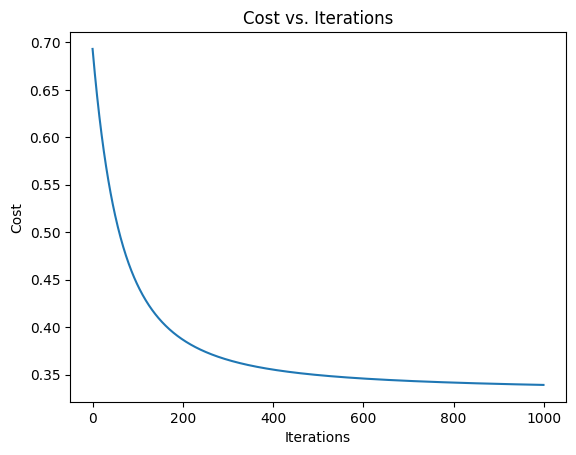

In [33]:
# huấn luyện mô hình
theta = np.zeros(x_train.shape[1])
learning_rate = 0.01
num_iterations = 1000
costs = []

for i in range(num_iterations):
    y_pred_train = sigmoid(np.dot(x_train, theta))
    gradient_descent(x_train, y_train, y_pred_train, theta, learning_rate)
    
    # Tính giá trị hàm mất mát và lưu vào danh sách 'costs'
    cost = loss(y_train, y_pred_train)
    costs.append(cost)
    
    if i % 100 == 0:
        print(f'Iteration {i}: theta = {theta}, cost = {cost}')

# In giá trị theta sau 1000 vòng lặp
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


In [34]:
y_pred_test = predict(x_test, theta)
data = {}
for col in x_test.columns:
    data[col] = x_test[col].tolist()
data['y_test'] = y_test.tolist()
data['y_pred_test'] = y_pred_test
test_results = pd.DataFrame(data)
print(test_results.sample(10))

          age       sex  restingbp  cholesterol  fastingbs     maxhr  \
130  0.433492 -0.568063   0.346080     0.547496   2.228901 -0.906922   
38   1.801983 -0.568063  -0.175019     1.308739  -0.448652 -1.274154   
115 -0.198119 -0.568063  -0.464519     0.006168   2.228901  1.051649   
40  -1.145536 -0.568063  -0.175019    -1.093405  -0.448652  0.398792   
146  0.433492 -0.568063   1.214580    -0.213747  -0.448652  0.970042   
8    0.538760  1.760370  -0.175019    -0.805824  -0.448652 -0.376476   
31  -0.829731 -0.568063  -0.290819     1.071908  -0.448652  1.214863   
9    2.328326 -0.568063   0.172381    -0.332162  -0.448652 -1.151743   
20   0.012418 -0.568063  -0.175019    -1.059572  -0.448652  0.317185   
26   0.644029 -0.568063  -0.638219    -0.196830  -0.448652 -0.947726   

     exerciseangina   oldpeak  chestpaintype_ASY  chestpaintype_ATA  \
130        1.264636  0.931212           1.008076          -0.534983   
38        -0.790742  1.397568           1.008076          -0.5349

In [35]:
# đánh giá mô hình
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
accuracy = np.mean(y_test == y_pred_test)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        79
           1       0.83      0.90      0.86        71

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

